In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [2]:
df = pd.read_csv('internet_service_churn.csv')
df.shape

(72274, 11)

In [3]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [4]:
df1 = df.drop(['id'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             72274 non-null  int64  
 1   is_movie_package_subscriber  72274 non-null  int64  
 2   subscription_age             72274 non-null  float64
 3   bill_avg                     72274 non-null  int64  
 4   reamining_contract           50702 non-null  float64
 5   service_failure_count        72274 non-null  int64  
 6   download_avg                 71893 non-null  float64
 7   upload_avg                   71893 non-null  float64
 8   download_over_limit          72274 non-null  int64  
 9   churn                        72274 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 5.5 MB


In [5]:
df1.nunique()

is_tv_subscriber                  2
is_movie_package_subscriber       2
subscription_age               1110
bill_avg                        179
reamining_contract              247
service_failure_count            19
download_avg                   2856
upload_avg                      802
download_over_limit               8
churn                             2
dtype: int64

In [6]:
df1.isnull().sum()

is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

because nan remaining contract means there's no remaining contract hence 0 years

In [7]:
df1.reamining_contract.fillna(0,inplace=True)
df1.isnull().sum()

is_tv_subscriber                 0
is_movie_package_subscriber      0
subscription_age                 0
bill_avg                         0
reamining_contract               0
service_failure_count            0
download_avg                   381
upload_avg                     381
download_over_limit              0
churn                            0
dtype: int64

In [8]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 0 categorical variables



In [9]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 10 numerical variables

The numerical variables : ['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit', 'churn']


array([[<AxesSubplot: title={'center': 'is_tv_subscriber'}>,
        <AxesSubplot: title={'center': 'is_movie_package_subscriber'}>,
        <AxesSubplot: title={'center': 'subscription_age'}>],
       [<AxesSubplot: title={'center': 'bill_avg'}>,
        <AxesSubplot: title={'center': 'reamining_contract'}>,
        <AxesSubplot: title={'center': 'service_failure_count'}>],
       [<AxesSubplot: title={'center': 'download_avg'}>,
        <AxesSubplot: title={'center': 'upload_avg'}>,
        <AxesSubplot: title={'center': 'download_over_limit'}>],
       [<AxesSubplot: title={'center': 'churn'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

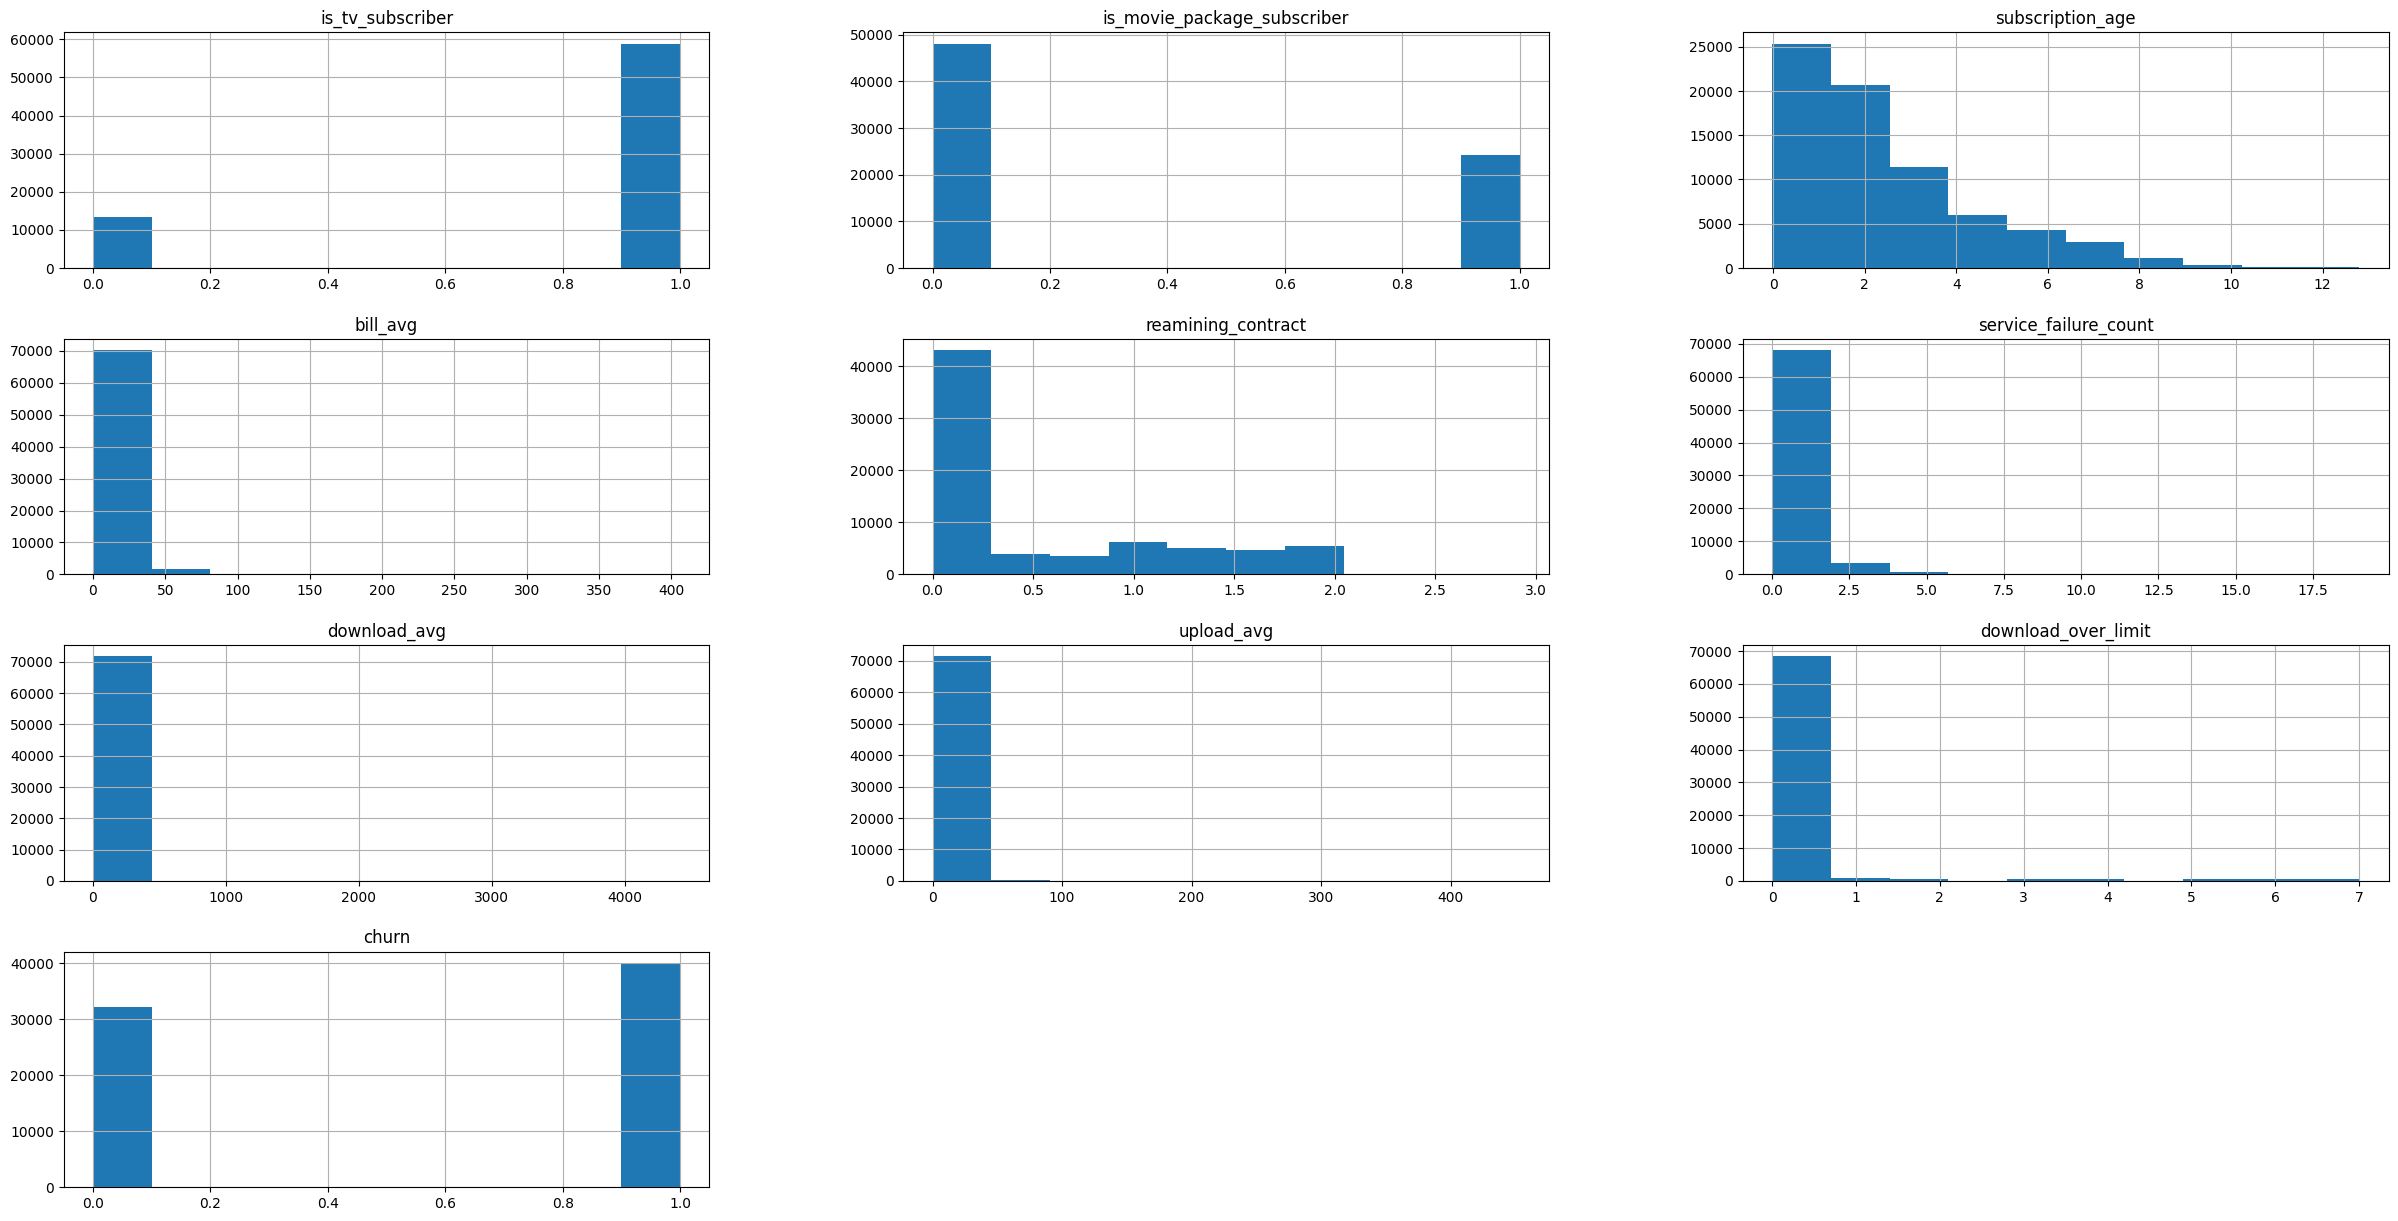

In [10]:
df1[numerical].hist(figsize=(30,15))

In [11]:
df1.isnull().sum()

is_tv_subscriber                 0
is_movie_package_subscriber      0
subscription_age                 0
bill_avg                         0
reamining_contract               0
service_failure_count            0
download_avg                   381
upload_avg                     381
download_over_limit              0
churn                            0
dtype: int64

In [12]:
df1.download_avg.fillna(df1.download_avg.median(),inplace=True)
df1.upload_avg.fillna(df1.upload_avg.median(),inplace=True)

In [13]:
df1.isnull().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

In [14]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

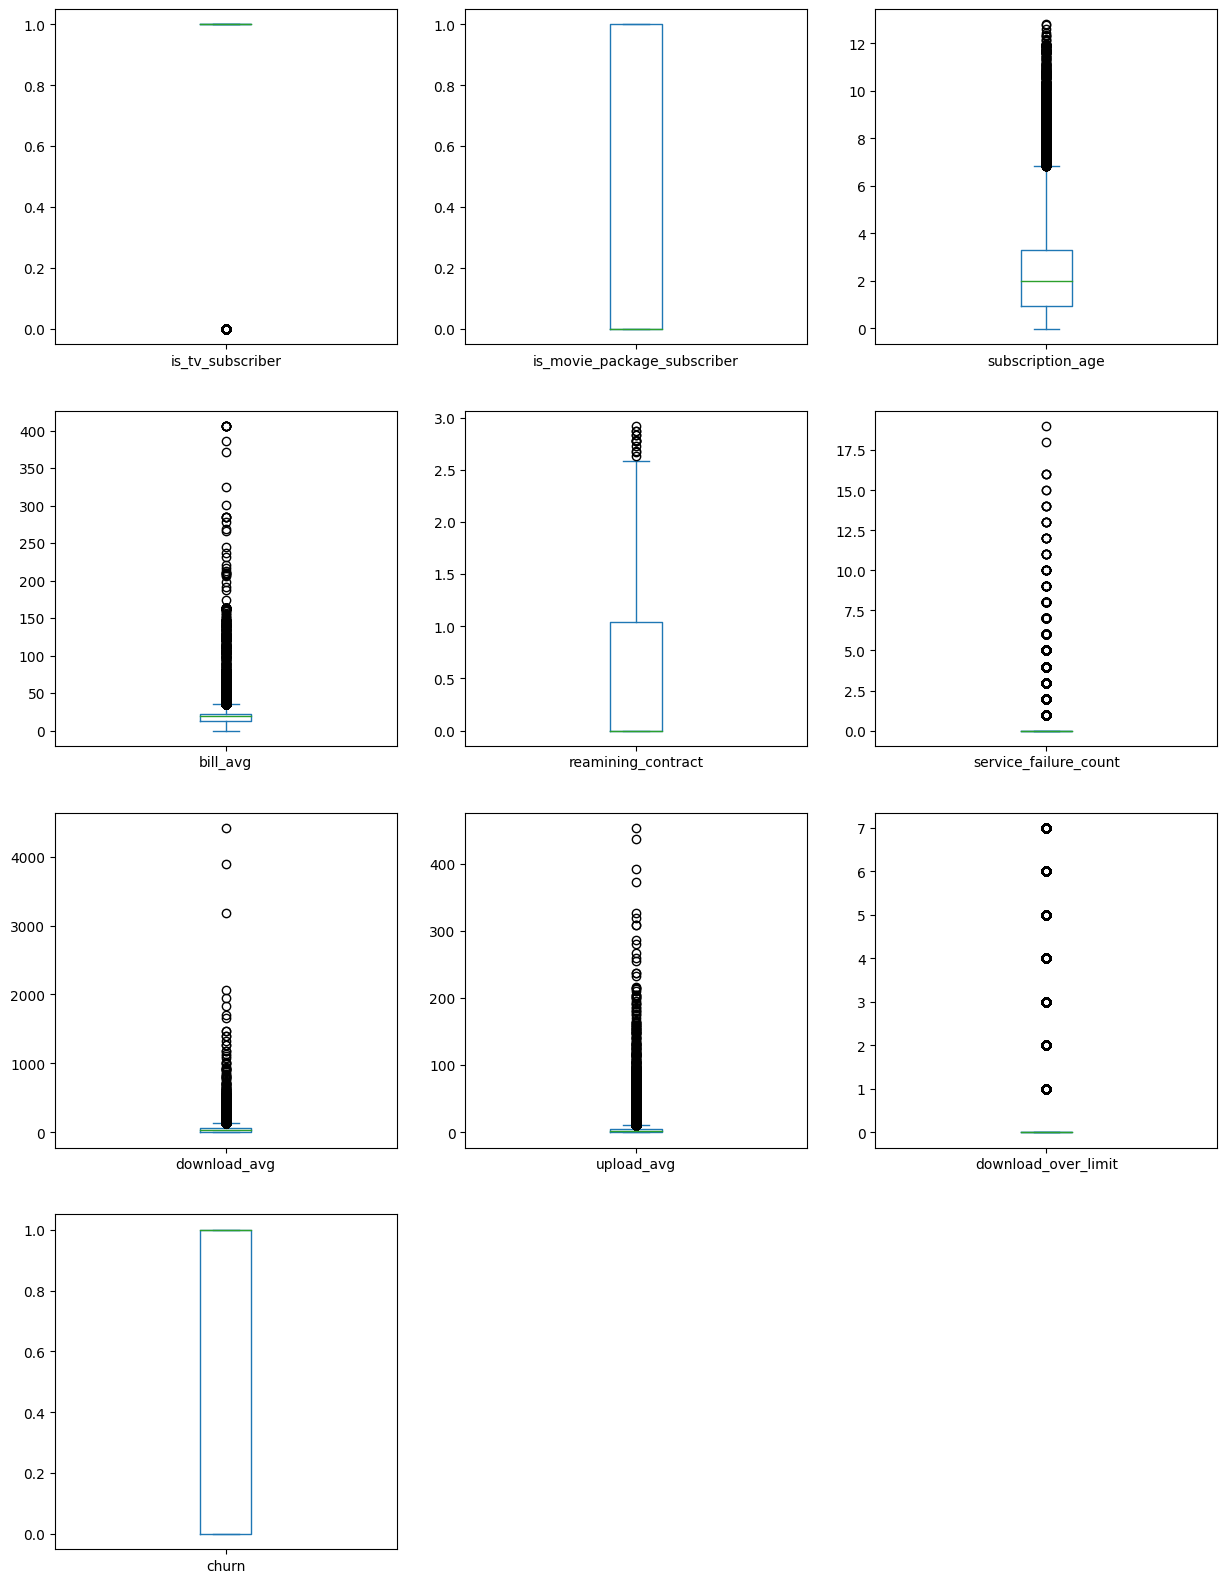

In [15]:
df1[numerical].plot(kind = "box",subplots = True,layout = (4,3),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [16]:
numerical

['is_tv_subscriber',
 'is_movie_package_subscriber',
 'subscription_age',
 'bill_avg',
 'reamining_contract',
 'service_failure_count',
 'download_avg',
 'upload_avg',
 'download_over_limit',
 'churn']

In [17]:
rem_list = ['bill_avg',
 'download_avg',
 'upload_avg']

In [18]:
df2 = treat_outliers_all(df1 , rem_list)

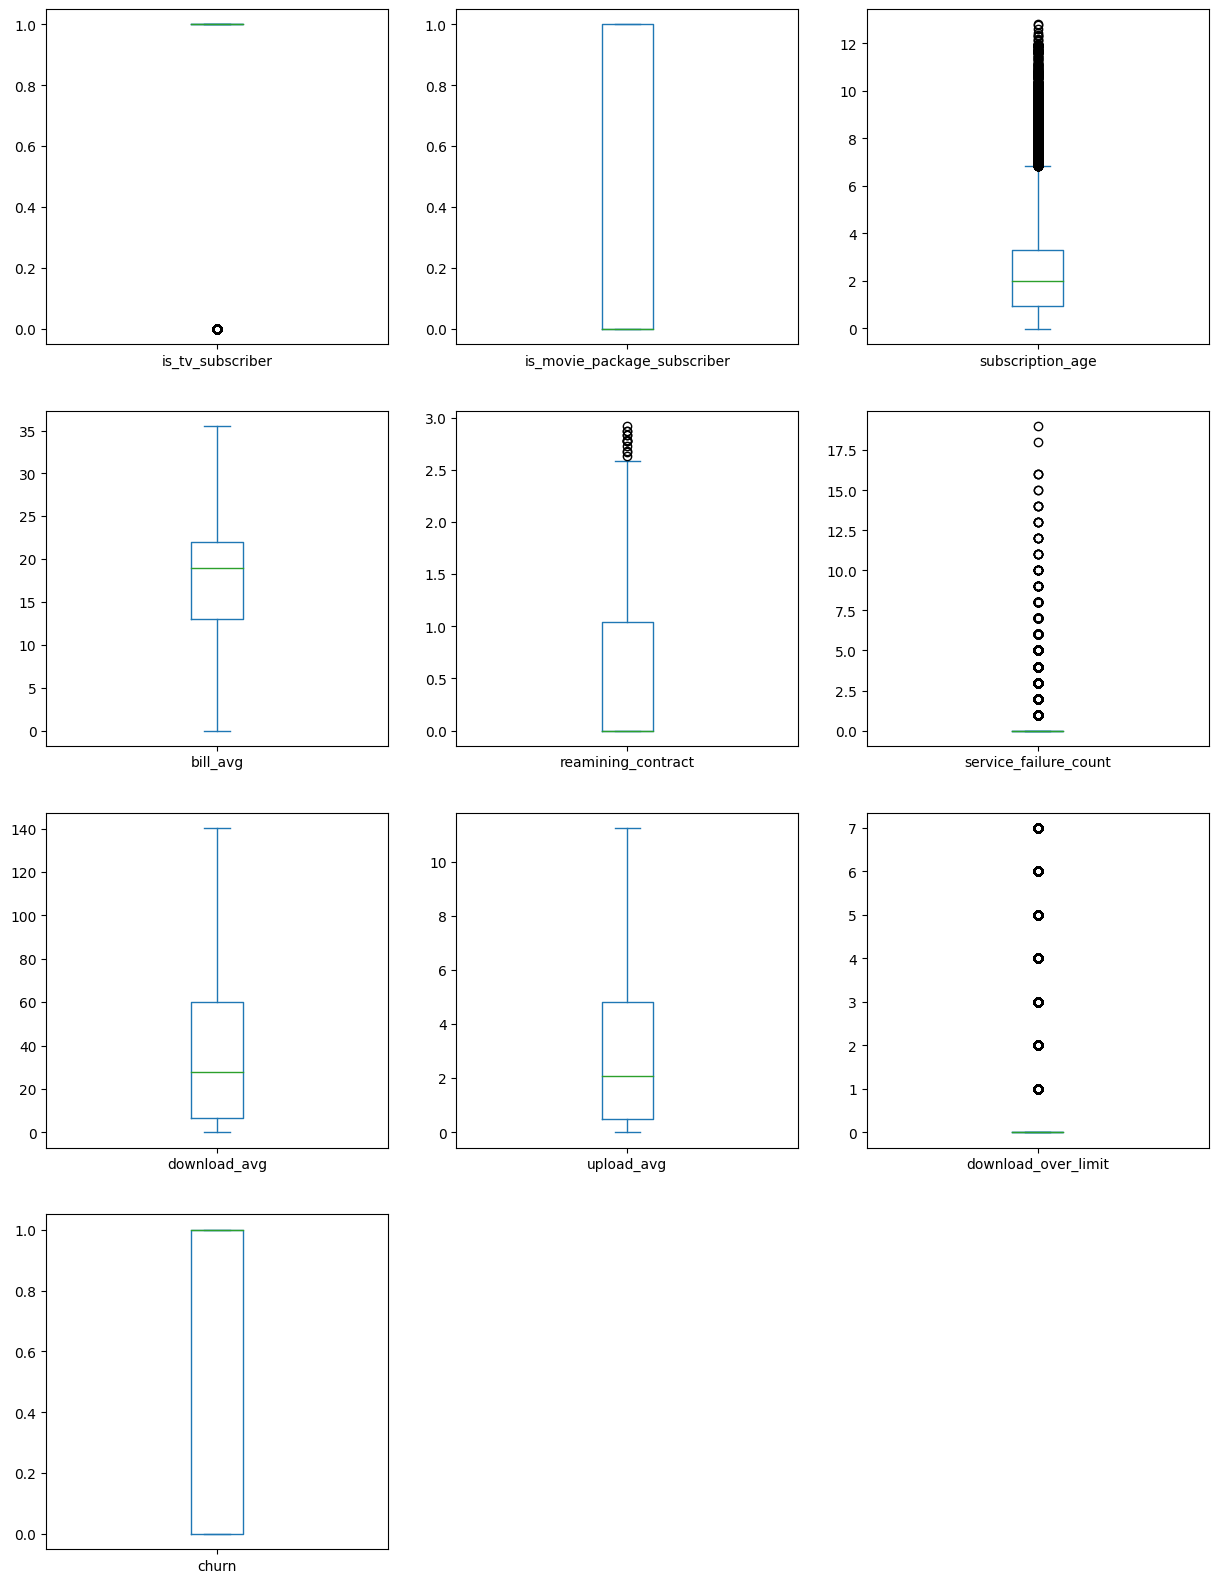

In [19]:
df2[numerical].plot(kind = "box",subplots = True,layout = (4,3),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

Feature Engineering

In [20]:
X = df2.drop(['churn'],axis=1)
y = df2.churn

X.shape, y.shape

((72274, 9), (72274,))

In [21]:
y.value_counts()

1    40050
0    32224
Name: churn, dtype: int64

In [22]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,stratify=y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((57819, 9), (14455, 9), (57819,), (14455,))

In [23]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [58]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_RF, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [59]:
print('Training set score: {:.4f}'.format(logreg.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_RF, y_test)))

Training set score: 0.8707
Test set score: 0.8710


In [98]:
y_pred = logreg.predict(X_test_RF)

In [100]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5330, 1115],
       [ 749, 7261]], dtype=int64)

In [101]:
log_accuracy = logreg.score(X_test_RF, y_test)
log_accuracy

0.8710480802490488

In [102]:
# precision
log_pre = precision_score(y_test, y_pred)
log_pre

0.8668815663801337

In [103]:
# recall
log_rec = recall_score(y_test, y_pred)
log_rec

0.9064918851435705

KNN

In [61]:
from math import sqrt
print(sqrt(X_train.shape[1]))

3.0


In [62]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,5)
#20 because sqrt of len(X_train)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

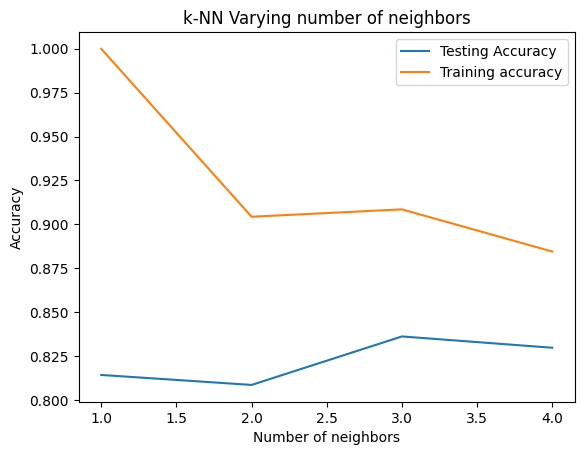

In [63]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [85]:
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(X_train, y_train)
    
#Compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)
    
#Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)

print('Training accuracy: ',train_accuracy)
print('\nTesting accuracy: ',test_accuracy)

Training accuracy:  0.9085421747176534

Testing accuracy:  0.8361812521618817


In [87]:
y_pred = knn.predict(X_test)

In [88]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5392, 1053],
       [1315, 6695]], dtype=int64)

In [90]:
knn_accuracy = knn.score(X_test, y_test)
knn_accuracy

0.8361812521618817

In [91]:
# precision
knn_pre = precision_score(y_test, y_pred)
knn_pre

0.8640939597315436

In [92]:
# recall
knn_rec = recall_score(y_test, y_pred)
knn_rec

0.8358302122347067

Random Forests

In [68]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12,n_estimators=10)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9356


In [69]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc_100 = RandomForestClassifier(random_state=12,n_estimators=100)

# fit the model
rfc_100.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc_100.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.9388


In [70]:
print('Training set score: {:.4f}'.format(rfc_100.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_RF, y_test)))

Training set score: 0.9999
Test set score: 0.9388


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestClassifier(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [93]:
y_pred = clf.predict(X_test_RF)

In [74]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 0.9822
Test set score: 0.9399


In [75]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

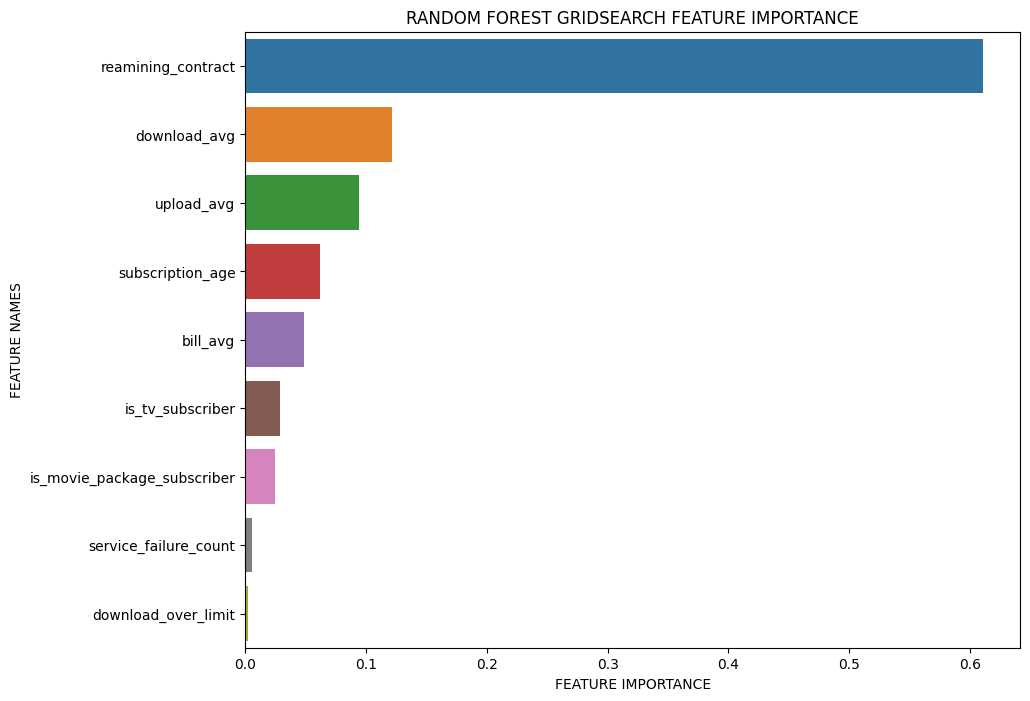

In [77]:
plot_feature_importance(clf.best_estimator_.feature_importances_,X_train_RF.columns,'RANDOM FOREST GRIDSEARCH ')

In [78]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6085,  360],
       [ 509, 7501]], dtype=int64)

In [96]:
rfcv_accuracy = clf.score(X_test_RF, y_test)
rfcv_accuracy

0.9398823936354203

In [95]:
# precision
rfcv_pre = precision_score(y_test, y_pred)
rfcv_pre

0.9542042997074164

In [94]:
# recall
rfcv_rec = recall_score(y_test, y_pred)
rfcv_rec

0.93645443196005

since it took 15 mins to build, its worth saving it locally!

In [ ]:
import pickle
pickle.dump(clf, open('rfcv.pkl', 'wb'))

CNN

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [25]:
churn_model = Sequential()
churn_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dense(1024, activation = "relu"))
churn_model.add(Dropout(0.2))
churn_model.add(Dense(1024, activation = "relu"))
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dense(256, activation = "relu"))
churn_model.add(Flatten())
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dropout(0.5))
churn_model.add(Dense(512, activation = "relu"))
churn_model.add(Dropout(0.5))
# churn_model.add(Dense(1, activation = "sigmoid",kernel_regularizer = "binary_crossentropy"))
churn_model.add(Dense(1, activation = "sigmoid"))
churn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 256)               1

In [26]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
losses = tf.keras.losses.binary_crossentropy
churn_model.compile(optimizer=optimizer, loss=losses, metrics=['accuracy'])

In [27]:
m_loss = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [28]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='churn_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [29]:
history=churn_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=128, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


360/362 [============================>.] - ETA: 0s - loss: 0.2927 - accuracy: 0.8967
Epoch 1: val_accuracy improved from -inf to 0.91076, saving model to churn_model.h5
362/362 [==============================] - 4s 4ms/step - loss: 0.2924 - accuracy: 0.8969 - val_loss: 0.2721 - val_accuracy: 0.9108
Epoch 2/100
350/362 [============================>.] - ETA: 0s - loss: 0.2544 - accuracy: 0.9169
Epoch 2: val_accuracy improved from 0.91076 to 0.92235, saving model to churn_model.h5
362/362 [==============================] - 2s 6ms/step - loss: 0.2535 - accuracy: 0.9173 - val_loss: 0.2371 - val_accuracy: 0.9223
Epoch 3/100
355/362 [============================>.] - ETA: 0s - loss: 0.2428 - accuracy: 0.9220
Epoch 3: val_accuracy improved from 0.92235 to 0.92727, saving model to churn_model.h5
362/362 [==============================] - 2s 5ms/step - loss: 0.2427 - accuracy: 0.9221 - val_loss: 0.2262 - val_accuracy: 0.9273
Epoch 4/100
358/362 [============================>.] - ETA: 0s - loss:

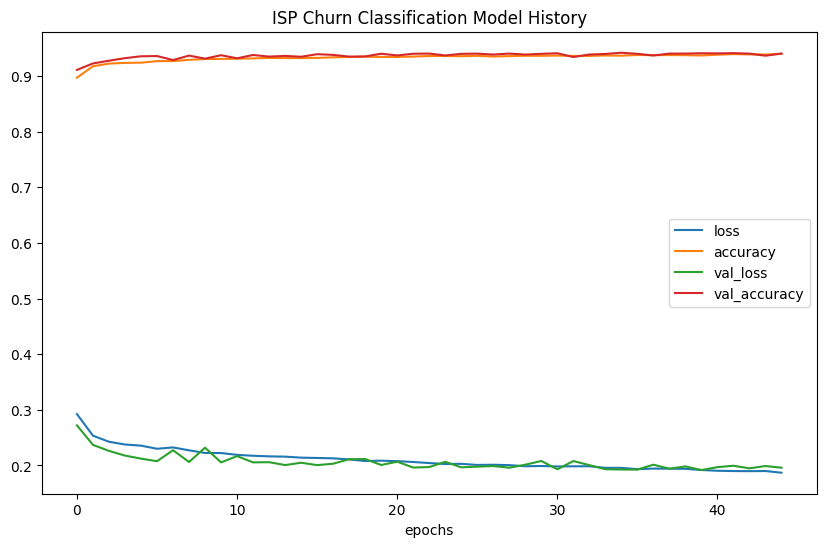

In [32]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('ISP Churn Classification Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [33]:
print("Evaluate churn_model against trained data")
score = churn_model.evaluate(X_train_RF, y_train, verbose=0)
print("score %s: %.2f%%" % (churn_model.metrics_names[1], score[1]*100))

print("Evaluate churn_model against test data")
score = churn_model.evaluate(X_test_RF, y_test, verbose=0)
print("score %s: %.2f%%" % (churn_model.metrics_names[1], score[1]*100))

Evaluate churn_model against trained data
score accuracy: 93.91%
Evaluate churn_model against test data
score accuracy: 93.54%


In [112]:
y_pred = churn_model.predict(X_test_RF)

452/452 [==============================] - 1s 1ms/step


In [114]:
# extract the predicted probabilities
p_pred = churn_model.predict(X_test_RF)
p_pred = p_pred.flatten()
print(p_pred.round(2))

452/452 [==============================] - 1s 1ms/step
[0.97 0.97 0.04 ... 0.03 0.08 1.  ]


In [115]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[1 1 0 ... 0 0 1]


In [116]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6024,  421],
       [ 527, 7483]], dtype=int64)

In [119]:
cnn_accuracy = (6024+7483)/(6024+7483+421+527)
cnn_accuracy

0.9344171566931857

In [120]:
# precision
cnn_pre = precision_score(y_test, y_pred)
cnn_pre

0.9467358299595142

In [121]:
# recall
cnn_rec = recall_score(y_test, y_pred)
cnn_rec

0.934207240948814

In [122]:
# creating performance dictionary
performance = {'Accuracy_Score':[log_accuracy, knn_accuracy, rfcv_accuracy, cnn_accuracy],
              'Precision':[log_pre, knn_pre, rfcv_pre, cnn_pre],
              'Recall': [log_rec, knn_rec, rfcv_rec, cnn_rec]}

In [125]:
performance_df = pd.DataFrame(data = performance, index= ['Logistic Regression', 'KNeighbors', 
                                                             'RandomForest Gridsearch',
                                                                'ANN'])

In [126]:
performance_df

,Accuracy_Score,Precision,Recall
Logistic Regression,0.871048,0.866882,0.906492
KNeighbors,0.836181,0.864094,0.835830
RandomForest Gridsearch,0.939882,0.954204,0.936454
ANN,0.934417,0.946736,0.934207


ANN comes very close to RF with Gridsearch, but does not do better. Maybe generating a better ANN model might help. However, ANN took 40 secs to build a model, whereas RFCV ran for about 15 mins! Hence we can see how Neural Networks can help achieve better results in shorter durations!